In [2]:
import os
import sys
from datetime import datetime

import yaml
import pandas as pd


os.chdir('..')
sys.path.append(os.getcwd())

# Initial configurations
config_filepath = 'config.yml'

with open(config_filepath, 'r') as f:
    config = yaml.safe_load(f)

# Deployment

## 1 Initialize Model and Explainer

In [15]:
import shap

from src.model_evaluation import AutogluonWrapper

In [19]:
abt = pd.read_csv(config['filepaths']['abt'])
feature_names = abt.columns

predictor = TabularPredictor.load(config['filepaths']['model'])

In [21]:
wrapper = AutogluonWrapper(predictor, feature_names)
explainer = shap.KernelExplainer(
    wrapper.predict_binary_prob, abt, feature_names=feature_names)

Using 714 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


## 2 On Demand Prediction

In [3]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [9]:
abt

,Age,SibSp,Parch,Fare,Survived,Pclass,Sex,Embarked
0,22,1,0,7.250,0,3,male,S
1,38,1,0,50.000,1,1,female,C
2,26,0,0,7.925,1,3,female,S
3,35,1,0,50.000,1,1,female,S
4,35,0,0,8.050,0,3,male,S
...,...,...,...,...,...,...,...,...
709,39,0,5,29.125,0,3,female,Q
710,27,0,0,13.000,0,2,male,S
711,19,0,0,30.000,1,1,female,S
712,26,0,0,30.000,1,1,male,C


In [8]:
abt.dtypes

Age           int64
SibSp         int64
Parch         int64
Fare        float64
Survived      int64
Pclass        int64
Sex          object
Embarked     object
dtype: object

In [22]:
test_data = pd.DataFrame([{
    'Age': 20,
    'SibSp': 1,
    'Parch': 2,
    'Fare': 30,
    'Sex': 'male',
    'Embarked': 'S',
    'Pclass': 2
}])

In [23]:
predictor.predict(test_data)

0    0
Name: Survived, dtype: int64

In [27]:
abt

,Age,SibSp,Parch,Fare,Survived,Pclass,Sex,Embarked
0,22,1,0,7.250,0,3,male,S
1,38,1,0,50.000,1,1,female,C
2,26,0,0,7.925,1,3,female,S
3,35,1,0,50.000,1,1,female,S
4,35,0,0,8.050,0,3,male,S
...,...,...,...,...,...,...,...,...
709,39,0,5,29.125,0,3,female,Q
710,27,0,0,13.000,0,2,male,S
711,19,0,0,30.000,1,1,female,S
712,26,0,0,30.000,1,1,male,C


In [30]:
shap_data = test_data.copy()
shap_data.loc[:, 'Survived'] = 0

In [36]:
shap_values = explainer(shap_data.loc[:, abt.columns])

  0%|          | 0/1 [00:00<?, ?it/s]

In [38]:
shap_explanation = shap.Explanation(shap_values.values,
                                    shap_values.base_values[0],
                                    shap_values.data,
                                    feature_names=feature_names)

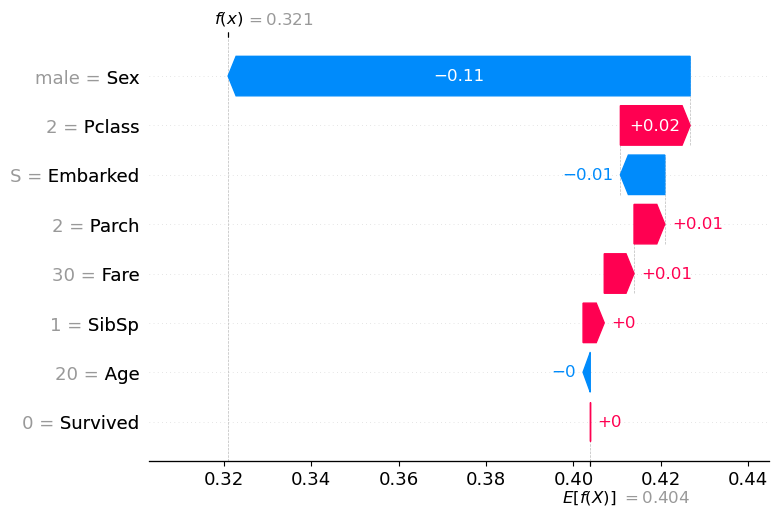

In [40]:
shap.plots.waterfall(shap_explanation[0])